In [56]:
import subprocess
import time
from subprocess import Popen, PIPE

## 1) Monte Carlo

#### 1.1 serial

In [35]:
!gcc montecarlo-serial.c -o montecarlo-serial.o

In [53]:
cmd = ["./montecarlo-serial.o", "40000000"]
start = time.time()
result = Popen(cmd, stdout=PIPE)
out = result.stdout.read()
elapsed_time = time.time() - start

In [70]:
float(out), elapsed_time

(3.1420214, 1.135866641998291)

#### 1.2 parallel

In [72]:
!gcc montecarlo-parallel.c -o montecarlo-parallel.o -fopenmp

In [83]:
cmd = ["./montecarlo-parallel.o", "40000000", "10"]
start = time.time()
result = Popen(cmd, stdout=PIPE)
out = result.stdout.read()
elapsed_time = time.time() - start

In [84]:
float(out), elapsed_time

(3.1413626, 0.16927218437194824)

## 2) Random Numbers Generation

#### 2.1 serial

In [92]:
!gcc random-numbers-serial.c -o random-numbers-serial.o -lm

In [88]:
cmd = ["./random-numbers-serial.o"]
start = time.time()
result = Popen(cmd, stdout=PIPE)
out = result.stdout.read()
elapsed_time = time.time() - start

In [90]:
out.decode('utf-8'), elapsed_time

('mu=-0.057675, sigma=577.516650\n', 0.08122372627258301)

#### 2.2 parallel

In [93]:
!gcc random-numbers-parallel.c -o random-numbers-parallel.o -lm -fopenmp

In [94]:
cmd = ["./random-numbers-parallel.o", "10"]
start = time.time()
result = Popen(cmd, stdout=PIPE)
out = result.stdout.read()
elapsed_time = time.time() - start

In [95]:
out.decode('utf-8'), elapsed_time

('mu=0.000920, sigma=577.292395\n', 0.01659536361694336)

## 3) Numerical Integration

In [121]:
NUM_SAMPLES_PI = 4e8
NUM_PARTITIONS = 1e8

#### 3.1 serial

In [122]:
!gcc numerical-integration-serial.c -o numerical-integration-serial.o -lm

In [123]:
cmd = ["./numerical-integration-serial.o", str(NUM_SAMPLES_PI), str(NUM_PARTITIONS)]
start = time.time()
result = Popen(cmd, stdout=PIPE)
out = result.stdout.read()
serial_elapsed_time = time.time() - start

In [124]:
out.decode('utf-8'), serial_elapsed_time

('PI 3.141676\nMU -0.472249\nSIGMA 577.891509\nintegral 0.682680\n',
 14.016451358795166)

#### 2.2 parallel

In [178]:
import multiprocessing
n_cpus = multiprocessing.cpu_count()
n_cpus

48

In [132]:
NUM_THREADS_LIST = list(range(1, n_cpus + 9))

In [131]:
!gcc numerical-integration-parallel.c -o numerical-integration-parallel.o -lm -fopenmp

In [ ]:
parallel_elapsed_times = []
for num_threads in NUM_THREADS_LIST:
    cmd = ["./numerical-integration-parallel.o", str(NUM_SAMPLES_PI), str(NUM_PARTITIONS), str(num_threads)]
    mean_elapsed_time = 0
    print("num_threads = %d" % num_threads)
    for _ in range(5):
        start = time.time()
        result = Popen(cmd, stdout=PIPE)
        out = result.stdout.read()
        elapsed_time = time.time() - start
        mean_elapsed_time += elapsed_time
        print("\telapsed_time = %f seconds, out = %s" % (elapsed_time, out))
    mean_elapsed_time /= 5
    print("\tmean_elapsed_time = %f seconds" % mean_elapsed_time)
    parallel_elapsed_times.append(mean_elapsed_time)

num_threads = 1
	elapsed_time = 11.559575 seconds, out = b'PI = 3.141602\nMU=-0.606259, SIGMA=577.594147\nintegral = 0.682688\n'
	elapsed_time = 11.490887 seconds, out = b'PI = 3.141608\nMU=0.309161, SIGMA=577.764230\nintegral = 0.682688\n'
	elapsed_time = 11.551537 seconds, out = b'PI = 3.141587\nMU=0.714253, SIGMA=577.496334\nintegral = 0.682690\n'
	elapsed_time = 11.629676 seconds, out = b'PI = 3.141594\nMU=0.264326, SIGMA=577.583568\nintegral = 0.682689\n'
	elapsed_time = 11.480962 seconds, out = b'PI = 3.141601\nMU=-0.532027, SIGMA=577.536961\nintegral = 0.682689\n'
	mean_elapsed_time = 11.542527 seconds
num_threads = 2
	elapsed_time = 6.137659 seconds, out = b'PI = 3.141602\nMU=0.641871, SIGMA=577.671032\nintegral = 0.682689\n'
	elapsed_time = 6.179956 seconds, out = b'PI = 3.141591\nMU=0.079221, SIGMA=577.672987\nintegral = 0.682690\n'
	elapsed_time = 5.925773 seconds, out = b'PI = 3.141595\nMU=-0.130302, SIGMA=577.664626\nintegral = 0.682689\n'
	elapsed_time = 6.076028 seconds,

	elapsed_time = 1.189725 seconds, out = b'PI = 3.141583\nMU=0.713966, SIGMA=577.403676\nintegral = 0.682691\n'
	elapsed_time = 1.172410 seconds, out = b'PI = 3.141603\nMU=0.111545, SIGMA=577.832899\nintegral = 0.682688\n'
	elapsed_time = 1.190769 seconds, out = b'PI = 3.141520\nMU=0.232205, SIGMA=577.301126\nintegral = 0.682697\n'
	mean_elapsed_time = 1.189467 seconds
num_threads = 15
	elapsed_time = 1.129877 seconds, out = b'PI = 3.141495\nMU=-0.063641, SIGMA=577.760699\nintegral = 0.682700\n'
	elapsed_time = 1.274216 seconds, out = b'PI = 3.141662\nMU=0.093883, SIGMA=577.660008\nintegral = 0.682682\n'
	elapsed_time = 1.097477 seconds, out = b'PI = 3.141618\nMU=0.342852, SIGMA=577.324095\nintegral = 0.682687\n'
	elapsed_time = 1.114740 seconds, out = b'PI = 3.141390\nMU=0.507863, SIGMA=577.846804\nintegral = 0.682712\n'
	elapsed_time = 1.331238 seconds, out = b'PI = 3.141534\nMU=0.260473, SIGMA=577.781638\nintegral = 0.682696\n'
	mean_elapsed_time = 1.189510 seconds
num_threads = 16
	

	elapsed_time = 0.804297 seconds, out = b'PI = 3.141649\nMU=-0.018724, SIGMA=577.568625\nintegral = 0.682683\n'
	elapsed_time = 0.819276 seconds, out = b'PI = 3.141692\nMU=-0.298472, SIGMA=577.559266\nintegral = 0.682679\n'
	elapsed_time = 0.908581 seconds, out = b'PI = 3.141590\nMU=-0.419625, SIGMA=577.680584\nintegral = 0.682690\n'
	elapsed_time = 0.780598 seconds, out = b'PI = 3.141688\nMU=-0.143357, SIGMA=577.556242\nintegral = 0.682679\n'
	elapsed_time = 0.851702 seconds, out = b'PI = 3.141541\nMU=1.048684, SIGMA=577.810669\nintegral = 0.682695\n'
	mean_elapsed_time = 0.832891 seconds
num_threads = 29
	elapsed_time = 0.794431 seconds, out = b'PI = 3.141604\nMU=-0.177840, SIGMA=577.665799\nintegral = 0.682688\n'
	elapsed_time = 0.822541 seconds, out = b'PI = 3.141604\nMU=-0.177840, SIGMA=577.665799\nintegral = 0.682688\n'
	elapsed_time = 0.785803 seconds, out = b'PI = 3.141590\nMU=-0.502374, SIGMA=577.689890\nintegral = 0.682690\n'
	elapsed_time = 0.867944 seconds, out = b'PI = 3.1

	elapsed_time = 0.642630 seconds, out = b'PI = 3.141680\nMU=0.395076, SIGMA=577.526683\nintegral = 0.682680\n'
	elapsed_time = 0.632147 seconds, out = b'PI = 3.141680\nMU=0.395076, SIGMA=577.526683\nintegral = 0.682680\n'
	mean_elapsed_time = 0.649080 seconds
num_threads = 42
	elapsed_time = 0.660729 seconds, out = b'PI = 3.141600\nMU=-0.094032, SIGMA=577.718260\nintegral = 0.682689\n'
	elapsed_time = 0.633086 seconds, out = b'PI = 3.141794\nMU=-0.137209, SIGMA=577.722030\nintegral = 0.682668\n'
	elapsed_time = 0.653097 seconds, out = b'PI = 3.141794\nMU=-0.137209, SIGMA=577.722030\nintegral = 0.682668\n'
	elapsed_time = 0.648445 seconds, out = b'PI = 3.141571\nMU=-0.149506, SIGMA=577.865936\nintegral = 0.682692\n'
	elapsed_time = 0.646140 seconds, out = b'PI = 3.141665\nMU=-0.557337, SIGMA=577.759326\nintegral = 0.682682\n'
	mean_elapsed_time = 0.648299 seconds
num_threads = 43
	elapsed_time = 0.676903 seconds, out = b'PI = 3.141676\nMU=-0.563316, SIGMA=577.807864\nintegral = 0.682680

In [179]:
import matplotlib.pyplot as plt

In [180]:
def plot_speedup_vs_num_threads(num_threads_list, serial_time, parallel_times, serial_frac):
    real_speedups = [serial_time/t for t in parallel_times]
    theo_speedups = [1./(serial_frac + (1. - serial_frac) / nt) for nt in num_threads_list]
    plt.figure(figsize=(10,7))
    plt.plot(NUM_THREADS_LIST, theo_speedups, label="Theoretical Speedup")
    plt.plot(NUM_THREADS_LIST, real_speedups, label="Real Speedup")    
    plt.xlabel('Number of threads')
    plt.ylabel('Speedup')
    plt.title('Speedup vs Number of threads')
    plt.legend()
    plt.show()

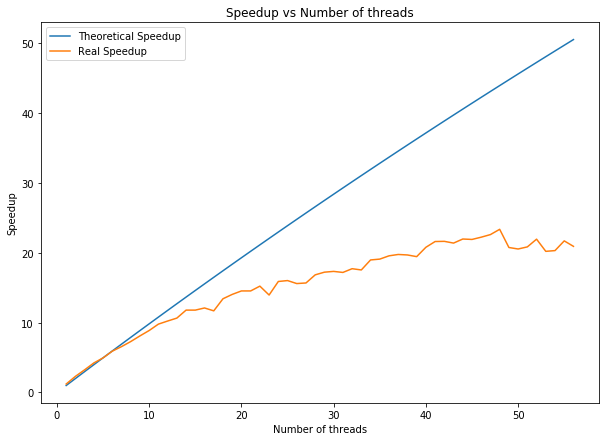

In [187]:
serial_frac = 1e6 / (1e6 + NUM_SAMPLES_PI + 2e6 + NUM_PARTITIONS)
plot_speedup_vs_num_threads(NUM_THREADS_LIST, serial_elapsed_time, parallel_elapsed_times, serial_frac)

Notamos que el speedup teórico y el real se mantienen relativamente similares hasta los 6 threads, de ahí el speedup real empieza progresivamente a distanciarse del speedup teórico. Más aún, cuando la cantidad de threads supera el número de CPUs disponbiles (48) el speedup real experimenta una caída notoria.